In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from google.colab import drive
import os
import pathlib
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-24 07:44:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-24 07:44:09 (76.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data

In [5]:
unzip_data("/content/drive/MyDrive/data/intel_images.zip")

In [6]:
# Walk through 10 perent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/intel_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 0 images in /content/intel_images
There are 0 directories and 7301 images in /content/intel_images/seg_pred
There are 6 directories and 0 images in /content/intel_images/seg_test
There are 0 directories and 437 images in /content/intel_images/seg_test/buildings
There are 0 directories and 553 images in /content/intel_images/seg_test/glacier
There are 0 directories and 501 images in /content/intel_images/seg_test/street
There are 0 directories and 525 images in /content/intel_images/seg_test/mountain
There are 0 directories and 474 images in /content/intel_images/seg_test/forest
There are 0 directories and 510 images in /content/intel_images/seg_test/sea
There are 6 directories and 0 images in /content/intel_images/seg_train
There are 0 directories and 2191 images in /content/intel_images/seg_train/buildings
There are 0 directories and 2404 images in /content/intel_images/seg_train/glacier
There are 0 directories and 2382 images in /content/intel_images/seg_t

In [7]:
data_dir = pathlib.Path("/content/intel_images/seg_train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [8]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


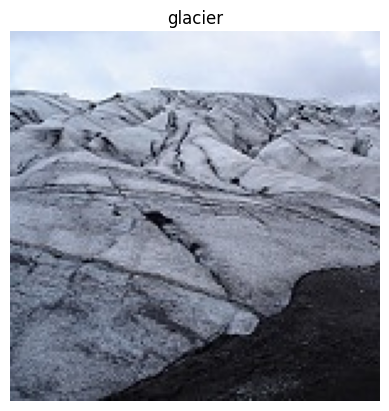

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/intel_images/seg_train/",
                        target_class="glacier")

Image shape: (150, 150, 3)


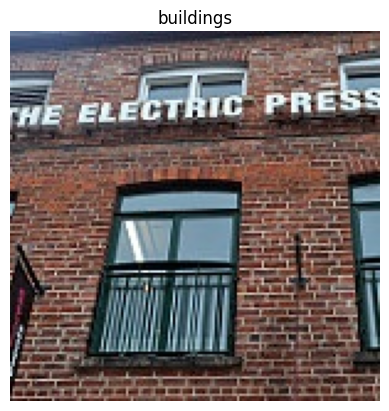

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/intel_images/seg_train/",
                        target_class="buildings")

Image shape: (150, 150, 3)


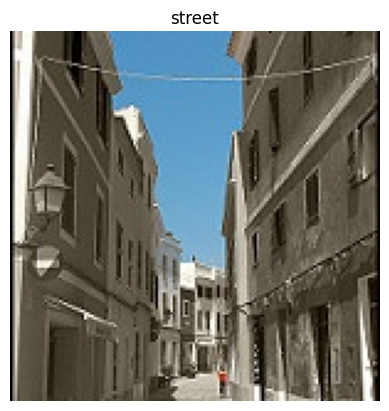

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/intel_images/seg_train/",
                        target_class="street")

In [12]:
# View the img (actually just a big array/tensor)
img, img.shape

(array([[[  4,   0,   0],
         [126, 119, 111],
         [230, 222, 211],
         ...,
         [110, 104,  92],
         [ 62,  55,  47],
         [  4,   0,   0]],
 
        [[  8,   3,   0],
         [131, 124, 116],
         [234, 226, 215],
         ...,
         [112, 106,  94],
         [ 67,  60,  52],
         [  5,   0,   0]],
 
        [[  3,   0,   0],
         [121, 117, 106],
         [230, 222, 209],
         ...,
         [112, 106,  94],
         [ 69,  62,  54],
         [  8,   3,   0]],
 
        ...,
 
        [[  4,   0,   0],
         [127, 122, 116],
         [168, 161, 151],
         ...,
         [107,  98,  89],
         [ 22,  15,   7],
         [  9,   2,   0]],
 
        [[  4,   0,   0],
         [125, 120, 114],
         [165, 158, 148],
         ...,
         [117, 108,  99],
         [ 24,  17,   9],
         [  5,   0,   0]],
 
        [[  5,   0,   0],
         [124, 119, 113],
         [163, 156, 146],
         ...,
         [138, 131, 121],
  

In [13]:
train_dir = "/content/intel_images/seg_train/"
test_dir = "/content/intel_images/seg_test/"

In [14]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [15]:
train_data = image_dataset_from_directory(directory=train_dir,
                                          image_size=IMG_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

test_data = image_dataset_from_directory(directory=test_dir,
                                         image_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         label_mode="categorical")

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [16]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>)

In [17]:
train_data.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [18]:
# See an example of the batch dataset
for images, labels in train_data.take(1):
  print(images, labels)


tf.Tensor(
[[[[235. 255.  98.]
   [223. 242.  91.]
   [199. 206.  77.]
   ...
   [106. 128.  45.]
   [ 83.  98.  15.]
   [102. 114.  30.]]

  [[140. 167.  10.]
   [144. 164.  17.]
   [167. 176.  51.]
   ...
   [ 77.  95.  19.]
   [ 62.  76.   0.]
   [ 94. 105.  27.]]

  [[202. 235.  86.]
   [156. 180.  40.]
   [214. 224. 102.]
   ...
   [ 69.  81.  19.]
   [ 43.  53.   0.]
   [ 81.  92.  26.]]

  ...

  [[ 34.  33.   5.]
   [ 17.  17.   0.]
   [ 20.  20.   0.]
   ...
   [117.  91.  40.]
   [113.  85.  35.]
   [116.  89.  36.]]

  [[  9.  13.   0.]
   [ 10.  16.   0.]
   [  1.  11.   0.]
   ...
   [123.  96.  43.]
   [118.  91.  38.]
   [120.  93.  38.]]

  [[ 68.  77.  48.]
   [ 43.  54.  24.]
   [ 48.  63.  34.]
   ...
   [116.  89.  34.]
   [112.  85.  30.]
   [116.  89.  34.]]]


 [[[128. 148. 159.]
   [119. 139. 150.]
   [ 99. 121. 134.]
   ...
   [129. 145. 144.]
   [129. 145. 145.]
   [135. 151. 151.]]

  [[100. 122. 135.]
   [ 92. 114. 127.]
   [ 92. 115. 129.]
   ...
   [131. 1

## Create modelling callbacks


In [19]:
# Create TensorBoard callback (already have "create_tensorboard_callback()" from a previous notebook)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      montior="val_acc", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

## Setup mixed precision training


In [20]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [21]:
mixed_precision.global_policy() # should output "mixed_float16"

<Policy "mixed_float16">

## MODEL 1: EfficientNetB0 Feature Extraction Model


In [22]:
# Create base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False # freeze base model layers

# Create Functional Model
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) # set base_model to inference mode only
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

16705208/16705208 [==============================] - 0s 0us/step


In [23]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 4049571 (15.45 MB)
___________________

In [24]:
# Check the dtype_policy attributes of layers in our model
for layer in model_1.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
output_layer True float32 <Policy "mixed_float16">


In [25]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model_1.layers[1].layers[:20]: # only check the first 20 layers to save output space
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [26]:
history_model_1 = model_1.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/5
439/439 [==============================] - 18s 20ms/step - loss: 0.3401 - accuracy: 0.8865 - val_loss: 0.2341 - val_accuracy: 0.9286
Epoch 2/5
439/439 [==============================] - 7s 15ms/step - loss: 0.2087 - accuracy: 0.9267 - val_loss: 0.1888 - val_accuracy: 0.9286
Epoch 3/5
439/439 [==============================] - 6s 14ms/step - loss: 0.1849 - accuracy: 0.9337 - val_loss: 0.2052 - val_accuracy: 0.9219
Epoch 4/5
439/439 [==============================] - 6s 14ms/step - loss: 0.1701 - accuracy: 0.9394 - val_loss: 0.2166 - val_accuracy: 0.9129
Epoch 5/5
439/439 [==============================] - 7s 15ms/step - loss: 0.1583 - accuracy: 0.9453 - val_loss: 0.2247 - val_accuracy: 0.9062


In [27]:
model_1_result =  model_1.evaluate(test_data)

94/94 [==============================] - 1s 14ms/step - loss: 0.2187 - accuracy: 0.9210


## MODEL 2: EfficientNetB0 Feature Extraction Model with Data Augmentation





In [28]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in

],name="data_augmentation_layer")

In [29]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

x = data_augmentation(inputs)

x= base_model(x, training=False)

x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, output)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [30]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 7686

In [31]:
history_model_2 = model_2.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/5
439/439 [==============================] - 45s 85ms/step - loss: 0.4982 - accuracy: 0.8272 - val_loss: 0.2867 - val_accuracy: 0.9107
Epoch 2/5
439/439 [==============================] - 28s 64ms/step - loss: 0.3340 - accuracy: 0.8792 - val_loss: 0.2527 - val_accuracy: 0.9085
Epoch 3/5
439/439 [==============================] - 23s 53ms/step - loss: 0.3128 - accuracy: 0.8865 - val_loss: 0.2331 - val_accuracy: 0.9286
Epoch 4/5
439/439 [==============================] - 21s 49ms/step - loss: 0.2990 - accuracy: 0.8923 - val_loss: 0.2649 - val_accuracy: 0.9018
Epoch 5/5
439/439 [==============================] - 19s 43ms/step - loss: 0.2916 - accuracy: 0.8941 - val_loss: 0.2587 - val_accuracy: 0.9040


In [32]:
model_2_result= model_2.evaluate(test_data)

94/94 [==============================] - 1s 13ms/step - loss: 0.2708 - accuracy: 0.8990


## MODEL 3: ResNet50 Feature Extraction Model


In [33]:
# 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.ResNet50(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

# If using ResNet50V2, add a rescale layer to the inputs
x = tf.keras.layers.Rescaling(1./255)(inputs)

# 4. Pass the inputs to the base_model
x = base_model(inputs, training=False) # set base_model to inference mode only

# 5. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Create the output activation layer
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 7. Combine the inputs with the outputs into a model
model_3 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

94765736/94765736 [==============================] - 0s 0us/step


In [34]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [35]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                                 
Total params: 23600006 (90.03 MB)
Trainable params: 12294 (48.02 KB)
Non-trainable params: 23587712 (89.98 MB)
______________

In [36]:
history_model_3 = model_3.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/5
439/439 [==============================] - 13s 19ms/step - loss: 0.3842 - accuracy: 0.8628 - val_loss: 0.2379 - val_accuracy: 0.9152
Epoch 2/5
439/439 [==============================] - 7s 16ms/step - loss: 0.2445 - accuracy: 0.9148 - val_loss: 0.2250 - val_accuracy: 0.9174
Epoch 3/5
439/439 [==============================] - 7s 16ms/step - loss: 0.2095 - accuracy: 0.9273 - val_loss: 0.2417 - val_accuracy: 0.9152
Epoch 4/5
439/439 [==============================] - 7s 15ms/step - loss: 0.1793 - accuracy: 0.9359 - val_loss: 0.2277 - val_accuracy: 0.9219
Epoch 5/5
439/439 [==============================] - 7s 16ms/step - loss: 0.1681 - accuracy: 0.9400 - val_loss: 0.2103 - val_accuracy: 0.9174


In [37]:
model_3_result = model_3.evaluate(test_data)

94/94 [==============================] - 2s 19ms/step - loss: 0.2993 - accuracy: 0.8997


## MODEL 4: ResNet50 Feature Extraction Model with Data Augmentation


In [38]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255)

],name="data_augmentation_layer")

In [39]:

# 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.ResNet50(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

# If using ResNet50V2, add a rescale layer to the inputs
x = data_augmentation(inputs)

# 4. Pass the inputs to the base_model
x = base_model(x , training=False) # set base_model to inference mode only

# 5. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Create the output activation layer
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 7. Combine the inputs with the outputs into a model
model_4 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 1229

In [41]:
history_model_4 = model_4.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)))

Epoch 1/5
439/439 [==============================] - 75s 160ms/step - loss: 1.7842 - accuracy: 0.2123 - val_loss: 1.7319 - val_accuracy: 0.2879
Epoch 2/5
439/439 [==============================] - 26s 59ms/step - loss: 1.7244 - accuracy: 0.2469 - val_loss: 1.7198 - val_accuracy: 0.2723
Epoch 3/5
439/439 [==============================] - 23s 52ms/step - loss: 1.6939 - accuracy: 0.2714 - val_loss: 1.6994 - val_accuracy: 0.2612
Epoch 4/5
439/439 [==============================] - 18s 41ms/step - loss: 1.6738 - accuracy: 0.2840 - val_loss: 1.6875 - val_accuracy: 0.2634
Epoch 5/5
439/439 [==============================] - 17s 38ms/step - loss: 1.6620 - accuracy: 0.2946 - val_loss: 1.6473 - val_accuracy: 0.3170


In [42]:
model_4_result = model_4.evaluate(test_data)

94/94 [==============================] - 1s 14ms/step - loss: 1.6488 - accuracy: 0.3120


## MODEL 5: MobileNetV3Large Feature Extraction Model with Data Augmentation


In [43]:
 # 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.MobileNetV3Large(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

# If using ResNet50V2, add a rescale layer to the inputs
# x = tf.keras.layers.Rescaling(1./255)(inputs)

# 4. Pass the inputs to the base_model
x = base_model(inputs, training=False) # set base_model to inference mode only

# 5. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Create the output activation layer
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 7. Combine the inputs with the outputs into a model
model_5 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

12683000/12683000 [==============================] - 0s 0us/step


In [44]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_5
1 rescaling_6
2 Conv
3 Conv/BatchNorm
4 tf.__operators__.add
5 re_lu
6 tf.math.multiply
7 multiply
8 expanded_conv/depthwise
9 expanded_conv/depthwise/BatchNorm
10 re_lu_1
11 expanded_conv/project
12 expanded_conv/project/BatchNorm
13 expanded_conv/Add
14 expanded_conv_1/expand
15 expanded_conv_1/expand/BatchNorm
16 re_lu_2
17 expanded_conv_1/depthwise/pad
18 expanded_conv_1/depthwise
19 expanded_conv_1/depthwise/BatchNorm
20 re_lu_3
21 expanded_conv_1/project
22 expanded_conv_1/project/BatchNorm
23 expanded_conv_2/expand
24 expanded_conv_2/expand/BatchNorm
25 re_lu_4
26 expanded_conv_2/depthwise
27 expanded_conv_2/depthwise/BatchNorm
28 re_lu_5
29 expanded_conv_2/project
30 expanded_conv_2/project/BatchNorm
31 expanded_conv_2/Add
32 expanded_conv_3/expand
33 expanded_conv_3/expand/BatchNorm
34 re_lu_6
35 expanded_conv_3/depthwise/pad
36 expanded_conv_3/depthwise
37 expanded_conv_3/depthwise/BatchNorm
38 re_lu_7
39 expanded_conv_3/squeeze_excite/AvgPool
40 expanded_conv_3/squ

In [45]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 MobilenetV3large (Function  (None, None, None, 960)   2996352   
 al)                                                             
                                                                 
 global_average_pooling_lay  (None, 960)               0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 5766      
                                                                 
Total params: 3002118 (11.45 MB)
Trainable params: 5766 (22.52 KB)
Non-trainable params: 2996352 (11.43 MB)
_________________

In [46]:
history_model_5 = model_5.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/5
439/439 [==============================] - 11s 15ms/step - loss: 0.3763 - accuracy: 0.8635 - val_loss: 0.2092 - val_accuracy: 0.9241
Epoch 2/5
439/439 [==============================] - 6s 13ms/step - loss: 0.2165 - accuracy: 0.9224 - val_loss: 0.1649 - val_accuracy: 0.9330
Epoch 3/5
439/439 [==============================] - 5s 12ms/step - loss: 0.1918 - accuracy: 0.9323 - val_loss: 0.1810 - val_accuracy: 0.9196
Epoch 4/5
439/439 [==============================] - 6s 13ms/step - loss: 0.1758 - accuracy: 0.9379 - val_loss: 0.2132 - val_accuracy: 0.9107
Epoch 5/5
439/439 [==============================] - 5s 12ms/step - loss: 0.1661 - accuracy: 0.9416 - val_loss: 0.1776 - val_accuracy: 0.9330


In [47]:
model_5_result =model_5.evaluate(test_data)

94/94 [==============================] - 1s 12ms/step - loss: 0.2362 - accuracy: 0.9117


## MODEL 6: MobileNetV3Large Feature Extraction Model with Data Augmentation


In [48]:
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) # Keep for models like ResNet50V2 but EfficientNet's having resclaing built-in

],name="data_augmentation_layer")

In [49]:
 # 1. Create the base model with tf.keras.application
base_model = tf.keras.applications.MobileNetV3Large(include_top=False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(150, 150, 3), name="input_layer")

# If using ResNet50V2, add a rescale layer to the inputs
x = data_augmentation(inputs)

# 4. Pass the inputs to the base_model
x = base_model(x, training=False) # set base_model to inference mode only

# 5. Average pool the outputs of the base model (aggregate all the important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# 6. Create the output activation layer
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)

# 7. Combine the inputs with the outputs into a model
model_6 = tf.keras.Model(inputs, outputs)

# 8. Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
model_6.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 MobilenetV3large (Function  (None, None, None, 960)   2996352   
 al)                                                             
                                                                 
 global_average_pooling_lay  (None, 960)               0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 5766

In [51]:
history_model_6  = model_6.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=5,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/5
439/439 [==============================] - 42s 86ms/step - loss: 0.5508 - accuracy: 0.7966 - val_loss: 0.2938 - val_accuracy: 0.8929
Epoch 2/5
439/439 [==============================] - 28s 64ms/step - loss: 0.3774 - accuracy: 0.8583 - val_loss: 0.2770 - val_accuracy: 0.8996
Epoch 3/5
439/439 [==============================] - 23s 52ms/step - loss: 0.3464 - accuracy: 0.8703 - val_loss: 0.2447 - val_accuracy: 0.8996
Epoch 4/5
439/439 [==============================] - 20s 45ms/step - loss: 0.3295 - accuracy: 0.8793 - val_loss: 0.2379 - val_accuracy: 0.9196
Epoch 5/5
439/439 [==============================] - 18s 40ms/step - loss: 0.3188 - accuracy: 0.8819 - val_loss: 0.2633 - val_accuracy: 0.9040


In [52]:
model_6_result = model_6.evaluate(test_data)

94/94 [==============================] - 1s 11ms/step - loss: 0.2780 - accuracy: 0.8963


## Results

In [53]:
results = pd.DataFrame({"Models": ["Model 1: EfficientNetB0", "Model 2: EfficientNetB0 with Data Augmentation", "Model 3: ResNet50",
                         "Model 4: ResNet50 with Data Augmentation", "Model 5: MobileNetV3", "Model 6: MobileNetV3 with Data Augmentation "],
              "Results":[model_1_result[1], model_2_result[1], model_3_result[1], model_4_result[1], model_5_result[1], model_6_result[1]]})

In [54]:
results

,Models,Results
0,Model 1: EfficientNetB0,0.921000
1,Model 2: EfficientNetB0 with Data Augmentation,0.899000
2,Model 3: ResNet50,0.899667
3,Model 4: ResNet50 with Data Augmentation,0.312000
4,Model 5: MobileNetV3,0.911667
5,Model 6: MobileNetV3 with Data Augmentation,0.896333


Our best model is the `EfficientNetB0` model. Now let's continue the operations on this model.

# Improve the our best model

In [96]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.1, # multiply the learning rate by 0.1 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)


In [56]:
# Create base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False # freeze base model layers

# Create Functional Model
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) # set base_model to inference mode only
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)


outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)


best_model = tf.keras.Model(inputs, outputs)


# Compile the model
best_model.compile(loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

In [57]:
best_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________

In [58]:
history_best_model= best_model.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=10,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint])

Epoch 1/10
439/439 [==============================] - 16s 19ms/step - loss: 0.3390 - accuracy: 0.8890 - val_loss: 0.2294 - val_accuracy: 0.9107
Epoch 2/10
400/439 [==========================>...] - ETA: 0s - loss: 0.2079 - accuracy: 0.9266

KeyboardInterrupt: 

In [ ]:
best_model.evaluate(test_data)

In [127]:
model_1_result[1]

0.92166668176651

we can see the training accuracy increase highly but the test accuracy is the same. For prevent this we should add small amount of the data augmentation.


> **TO DO**

* Fine Tuning
* Pred dosyasından random image çekerek tahin yapma

## Create Fine Tuning Model

In [98]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.1, # multiply the learning rate by 0.1 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)


In [99]:
# Create base model
input_shape = (150, 150, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False # freeze base model layers

# Create Functional Model
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False) # set base_model to inference mode only
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

In [100]:
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

In [102]:
history_model_1 = model_1.fit(train_data,
                              steps_per_epoch = len(train_data),
                              epochs=100,
                              validation_data= test_data,
                              validation_steps= int(0.15 * len(test_data)),
                              callbacks=[model_checkpoint,  early_stopping, reduce_lr])

Epoch 1/100
439/439 [==============================] - 16s 18ms/step - loss: 0.3326 - accuracy: 0.8903 - val_loss: 0.2460 - val_accuracy: 0.9018 - lr: 0.0010
Epoch 2/100
439/439 [==============================] - 6s 15ms/step - loss: 0.2072 - accuracy: 0.9268 - val_loss: 0.2231 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 3/100
439/439 [==============================] - 6s 14ms/step - loss: 0.1837 - accuracy: 0.9355 - val_loss: 0.2202 - val_accuracy: 0.9107 - lr: 0.0010
Epoch 4/100
439/439 [==============================] - 6s 14ms/step - loss: 0.1683 - accuracy: 0.9410 - val_loss: 0.2175 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 5/100
439/439 [==============================] - 6s 14ms/step - loss: 0.1573 - accuracy: 0.9440 - val_loss: 0.2137 - val_accuracy: 0.9085 - lr: 0.0010
Epoch 6/100
439/439 [==============================] - 6s 14ms/step - loss: 0.1491 - accuracy: 0.9485 - val_loss: 0.2085 - val_accuracy: 0.9196 - lr: 0.0010
Epoch 7/100
439/439 [==============================] - 6s

In [103]:
# What layers are in our base_model (EfficientNetB0)
for i, layer in enumerate(model_1.layers[1].layers):
  print(i, layer.name , layer.trainable)

0 input_11 False
1 rescaling_16 False
2 normalization_6 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [104]:
# How many trainable variable are in our base model?
print(len(model_1.layers[1].trainable_variables))

0


In [105]:
# To begin fine-tuning, let's start by setting the last 10 layers of our base_model.trainable= false
base_model.trainable= True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable= False


# Recompile (we have to recompile our models every time we make a change)
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine-tuning you typically want to lower the learning rate by 10x.
                metrics=["accuracy"],
                   )

In [106]:
# What layers are in our base_model (EfficientNetB0)
for i, layer in enumerate(model_1.layers[1].layers):
  print(i, layer.name , layer.trainable)

0 input_11 False
1 rescaling_16 False
2 normalization_6 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [107]:
# The number of trainable variables
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 900918 (3.44 MB)
Non-trainable params: 3156339 (12.04 MB)
_______________

In [108]:
print(len(model_1.trainable_variables))


12


In [109]:
# Fine tune for another 5 epochs


# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune_model = model_1.fit(train_data,
                                         steps_per_epoch = len(train_data),
                                         epochs=200,
                                         validation_data=test_data,
                                         initial_epoch=history_model_1.epoch[-1], # start from previous last epoch
                                         validation_steps=int(0.15 * len(test_data)),
                                         callbacks= [model_checkpoint, early_stopping,reduce_lr]) # name experiment appropriately


Epoch 11/200
439/439 [==============================] - 17s 20ms/step - loss: 0.1273 - accuracy: 0.9544 - val_loss: 0.2116 - val_accuracy: 0.9152 - lr: 1.0000e-04
Epoch 12/200
439/439 [==============================] - 7s 16ms/step - loss: 0.0911 - accuracy: 0.9696 - val_loss: 0.2000 - val_accuracy: 0.9196 - lr: 1.0000e-04
Epoch 13/200
439/439 [==============================] - 7s 16ms/step - loss: 0.0697 - accuracy: 0.9776 - val_loss: 0.2286 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 14/200
437/439 [============================>.] - ETA: 0s - loss: 0.0544 - accuracy: 0.9832
Epoch 14: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
439/439 [==============================] - 7s 16ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.2395 - val_accuracy: 0.9219 - lr: 1.0000e-04
Epoch 15/200
439/439 [==============================] - 7s 16ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.2228 - val_accuracy: 0.9330 - lr: 1.0000e-05


In [110]:
model_1.evaluate(test_data)

94/94 [==============================] - 1s 14ms/step - loss: 0.2500 - accuracy: 0.9227


[0.2500051259994507, 0.9226666688919067]

## Visualizing predictions on random `seg_pred` images


In [310]:
def load_and_prep_image(img_shape=150):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Select the random image from the seg_pred
  filename = random.choice(os.listdir("/content/intel_images/seg_pred" + "/" ))
  filepath = "/content/intel_images/seg_pred" + "/" + filename

  # Read in the image
  img = tf.io.read_file(filepath)
  # Decode it into a tensor
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])


  return img

In [313]:
def pred_and_plot(model, class_names,scale_for_display=True):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """



  # Import the target image and preprocess it
  img = load_and_prep_image()

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.argmax(pred[0]))]
  print(f"Prediction vector: {pred}")
  # Get the predicted class index
  pred_class_index = int(tf.argmax(pred[0]))


  # Get the prediction probability for the predicted class
  pred_prob = pred[0][pred_class_index]



  # Plot the image and predicted class
  if scale_for_display:
    img_to_display = img / 255.0  # Scale image for display
  else:
    img_to_display = img


  plt.imshow(img_to_display)
  plt.title(f"Prediction: {pred_class}, Prob: {pred_prob:.2f}")
  plt.axis(False)
  plt.show()


*  **Every time we run the code below, it will take a random sample from the seg_pred class and create a prediction.**

1/1 [==============================] - 0s 33ms/step
Prediction vector: [[9.995e-01 2.205e-06 2.229e-05 4.172e-06 1.132e-06 2.151e-04]]


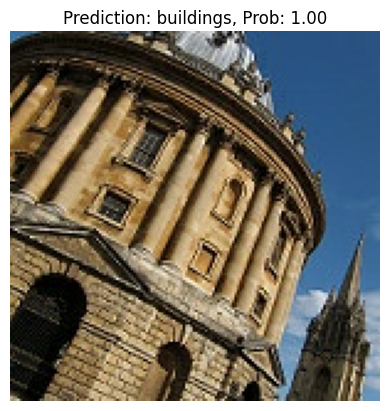

In [323]:
pred_and_plot(model_1, train_data.class_names)